In [46]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
news = {}
for index,line in enumerate(open('../data/News_Category_Dataset_v2.json', 'r')):
    news[index]=json.loads(line)

In [14]:
news[1]

{'category': 'ENTERTAINMENT',
 'headline': "Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song",
 'authors': 'Andy McDonald',
 'link': 'https://www.huffingtonpost.com/entry/will-smith-joins-diplo-and-nicky-jam-for-the-official-2018-world-cup-song_us_5b09726fe4b0fdb2aa541201',
 'short_description': 'Of course it has a song.',
 'date': '2018-05-26'}

In [5]:
authors = [news[k]['authors'] for k in news.keys()]

In [9]:
unique, counts = np.unique(authors, return_counts=True)
df = pd.DataFrame({'Authors':unique,'Counts':counts})
df.sort_values('Counts',inplace=True,ascending=False)

### First we can find the most active authors

<AxesSubplot:xlabel='Authors'>

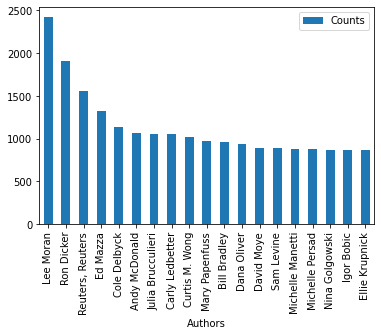

In [17]:
df.iloc[1:20].plot.bar(x='Authors', y='Counts') #Zero element is the news without author

### See the most active authors by Category

#### CRIME

In [1]:
def filter_category(news,category):
    news_new = {}
    for i in news.keys():
        if news[i]['category'] == category:
            news_new[i] = news[i]
    return news_new

<AxesSubplot:xlabel='Authors'>

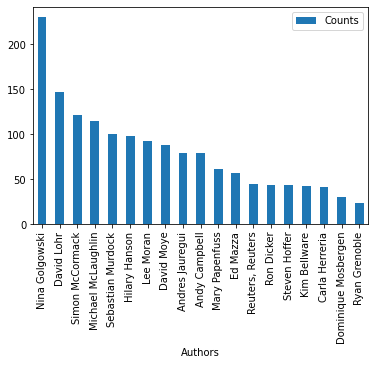

In [10]:
news_new = filter_category(news,'CRIME')
authors = [news_new[k]['authors'] for k in news_new.keys()]
unique, counts = np.unique(authors, return_counts=True)
df = pd.DataFrame({'Authors':unique,'Counts':counts})
df.sort_values('Counts',inplace=True,ascending=False)
df.iloc[1:20].plot.bar(x='Authors', y='Counts') #Zero element is the news without author

#### ENTERTAINMENT

<AxesSubplot:xlabel='Authors'>

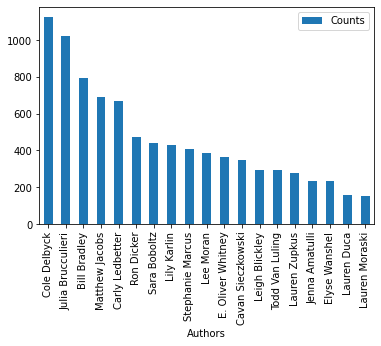

In [12]:
news_new = filter_category(news,'ENTERTAINMENT')
authors = [news_new[k]['authors'] for k in news_new.keys()]
unique, counts = np.unique(authors, return_counts=True)
df = pd.DataFrame({'Authors':unique,'Counts':counts})
df.sort_values('Counts',inplace=True,ascending=False)
df.iloc[1:20].plot.bar(x='Authors', y='Counts') #Zero element is the news without author

## Chracterize the types of topic written by an author

In [50]:
def author_filter(autor):
    authors = np.array([news[k]['authors'] for k in news.keys()])
    categories = np.array([news[k]['category'] for k in news.keys()])
    categories_author = categories[list(np.where(authors == autor)[0])]
    unique, counts = np.unique(categories_author, return_counts=True)
    df = pd.DataFrame({'Categories':unique,'Counts':counts})
    df.sort_values('Counts',inplace=True,ascending=False)
    df.iloc[1:20].plot.bar(x='Categories', y='Counts') 
    plt.show()

### Lee Moran

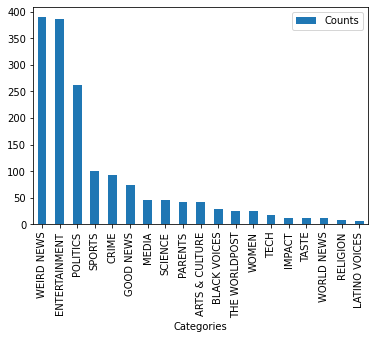

In [52]:
author_filter('Lee Moran')

### Ron Dicker

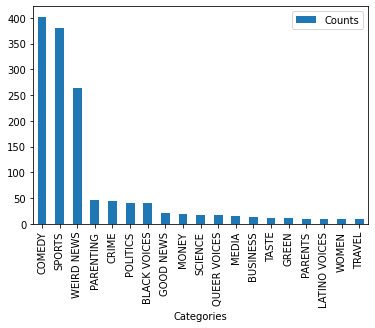

In [53]:
author_filter('Ron Dicker')